In [1]:
import os, shutil

original_dataset_dir = "data/catsVsDogs/train"

dirs = []

base_dir = "data/catsVsDogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)
   
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))
    
print("Done.")



data/catsVsDogs_small : 3
data/catsVsDogs_small/train : 2
data/catsVsDogs_small/validation : 2
data/catsVsDogs_small/test : 2
data/catsVsDogs_small/train/cats : 1000
data/catsVsDogs_small/train/dogs : 1000
data/catsVsDogs_small/validation/cats : 500
data/catsVsDogs_small/validation/dogs : 500
data/catsVsDogs_small/test/cats : 500
data/catsVsDogs_small/test/dogs : 500
Done.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3), 
    activation="relu", 
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150), 
    batch_size = 20,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150), 
    batch_size = 20,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150), 
    batch_size = 20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 100, # similar to batches
    epochs = 10,
    validation_data=val_generator,
    validation_steps = 50
)

Epoch 1/10
100/100 [==============================] - 151s 2s/step - loss: 0.6926 - acc: 0.5340 - val_loss: 0.6612 - val_acc: 0.6180
Epoch 2/10
100/100 [==============================] - 166s 2s/step - loss: 0.6472 - acc: 0.6215 - val_loss: 0.6413 - val_acc: 0.6230
Epoch 3/10
100/100 [==============================] - 169s 2s/step - loss: 0.5891 - acc: 0.6835 - val_loss: 0.6120 - val_acc: 0.6560
Epoch 4/10
100/100 [==============================] - 165s 2s/step - loss: 0.5497 - acc: 0.7180 - val_loss: 0.5721 - val_acc: 0.6910
Epoch 5/10
 16/100 [===>..........................] - ETA: 2:12 - loss: 0.5133 - acc: 0.7531

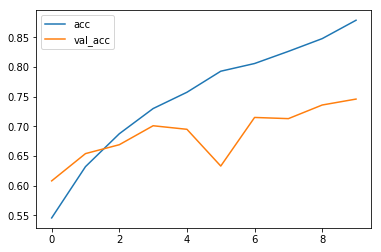

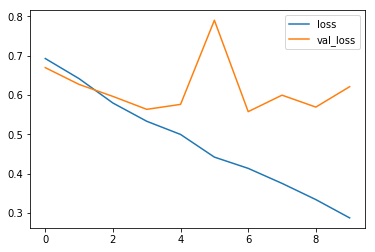

In [8]:
def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history) 